In [110]:
from holodecml.data import load_raw_datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import xarray as xr
import os
from os.path import join
from scipy.ndimage import label, center_of_mass


In [2]:
path_data = "/glade/p/cisl/aiml/ai4ess_hackathon/holodec/"
num_particles = "medium"
output_cols = ["x", "y", "hid"]
subset = 0.01
scaler_out = MinMaxScaler()


In [13]:
train_inputs_raw, train_outputs_raw = load_raw_datasets(path_data, num_particles,
                                                'train', output_cols, subset)


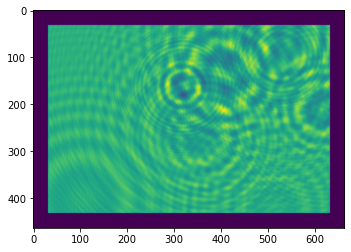

In [24]:
plt.imshow(np.pad(train_inputs_raw[0], 32).T)

In [96]:
train_outputs_raw["x_bin"] = np.digitize(train_outputs_raw['x'], np.linspace(-888, 888, 600))
train_outputs_raw["y_bin"] = np.digitize(train_outputs_raw['y'], np.linspace(-592, 592, 400))

diam = 64
patches = []
for hid in train_outputs_raw["hid"].unique():
    input_hid = np.pad(train_inputs_raw[int(hid)-1], 32)
    outputs_hid = train_outputs_raw.loc[train_outputs_raw['hid'] == hid]
    for index, row in outputs_hid.iterrows():
        idx_x, idx_y = int(row["x_bin"])+32, int(row["y_bin"])+32
        patch = input_hid[idx_x-32:idx_x+32+1, idx_y-32:idx_y+32+1]
        patches.append(patch)
patches = np.stack(patches)


526 95 (65, 65)
107 389 (65, 65)
363 275 (65, 65)
509 156 (65, 65)
615 210 (65, 65)
513 423 (65, 65)
107 406 (65, 65)
401 141 (65, 65)
318 163 (65, 65)
544 61 (65, 65)
327 242 (65, 65)
412 51 (65, 65)
504 46 (65, 65)
479 355 (65, 65)
201 214 (65, 65)
469 264 (65, 65)
375 196 (65, 65)
36 300 (65, 65)
111 290 (65, 65)
155 35 (65, 65)
314 411 (65, 65)
495 80 (65, 65)
113 428 (65, 65)
501 77 (65, 65)
379 381 (65, 65)
238 183 (65, 65)
84 345 (65, 65)
223 383 (65, 65)
431 134 (65, 65)
405 124 (65, 65)
76 224 (65, 65)
399 187 (65, 65)
459 238 (65, 65)
243 250 (65, 65)
477 120 (65, 65)
44 213 (65, 65)
84 111 (65, 65)
290 43 (65, 65)
486 276 (65, 65)
593 343 (65, 65)
572 86 (65, 65)
612 297 (65, 65)
227 355 (65, 65)
257 43 (65, 65)
389 348 (65, 65)
435 346 (65, 65)
351 424 (65, 65)
410 153 (65, 65)
224 157 (65, 65)
154 140 (65, 65)
626 95 (65, 65)
60 336 (65, 65)
53 408 (65, 65)
576 48 (65, 65)
145 264 (65, 65)
99 52 (65, 65)
296 38 (65, 65)
391 122 (65, 65)
506 322 (65, 65)
344 145 (65, 65)
27

190 33 (65, 65)
77 427 (65, 65)
280 417 (65, 65)
427 344 (65, 65)
174 178 (65, 65)
252 258 (65, 65)
617 56 (65, 65)
366 83 (65, 65)
141 114 (65, 65)
596 226 (65, 65)
220 418 (65, 65)
183 79 (65, 65)
449 322 (65, 65)
173 40 (65, 65)
389 91 (65, 65)
69 309 (65, 65)
378 246 (65, 65)
288 165 (65, 65)
164 249 (65, 65)
505 350 (65, 65)
368 259 (65, 65)
553 283 (65, 65)
557 88 (65, 65)
89 54 (65, 65)
107 309 (65, 65)
264 203 (65, 65)
197 127 (65, 65)
185 343 (65, 65)
388 163 (65, 65)
558 404 (65, 65)
92 68 (65, 65)
412 194 (65, 65)
183 232 (65, 65)
328 377 (65, 65)
426 52 (65, 65)
553 300 (65, 65)
515 328 (65, 65)
126 422 (65, 65)
544 82 (65, 65)
44 213 (65, 65)
379 397 (65, 65)
322 82 (65, 65)
579 409 (65, 65)
593 354 (65, 65)
341 51 (65, 65)
549 198 (65, 65)
368 283 (65, 65)
157 33 (65, 65)
390 159 (65, 65)
547 198 (65, 65)
403 314 (65, 65)
365 242 (65, 65)
463 62 (65, 65)
50 71 (65, 65)
53 121 (65, 65)
523 39 (65, 65)
272 154 (65, 65)
233 277 (65, 65)
294 421 (65, 65)
618 330 (65, 65)
297 

573 395 (65, 65)
401 246 (65, 65)
486 375 (65, 65)
209 140 (65, 65)
566 234 (65, 65)
54 245 (65, 65)
604 84 (65, 65)
452 113 (65, 65)
556 177 (65, 65)
617 420 (65, 65)
369 149 (65, 65)
236 237 (65, 65)
623 138 (65, 65)
185 361 (65, 65)
45 425 (65, 65)
352 231 (65, 65)
71 349 (65, 65)
314 33 (65, 65)
485 322 (65, 65)
51 283 (65, 65)
169 253 (65, 65)
81 362 (65, 65)
218 122 (65, 65)
110 147 (65, 65)
574 331 (65, 65)
43 181 (65, 65)
536 68 (65, 65)
595 221 (65, 65)
316 219 (65, 65)
84 227 (65, 65)
120 42 (65, 65)
226 44 (65, 65)
50 295 (65, 65)
271 138 (65, 65)
477 199 (65, 65)
594 407 (65, 65)
604 310 (65, 65)
144 107 (65, 65)
184 367 (65, 65)
509 253 (65, 65)
165 168 (65, 65)
285 381 (65, 65)
586 324 (65, 65)
259 231 (65, 65)
588 166 (65, 65)
595 406 (65, 65)
264 407 (65, 65)
188 258 (65, 65)
559 36 (65, 65)
576 261 (65, 65)
261 196 (65, 65)
66 252 (65, 65)
236 142 (65, 65)
49 422 (65, 65)
441 248 (65, 65)
613 276 (65, 65)
129 237 (65, 65)
492 327 (65, 65)
331 68 (65, 65)
578 35 (65, 65

61 245 (65, 65)
618 98 (65, 65)
392 257 (65, 65)
290 410 (65, 65)
362 228 (65, 65)
70 56 (65, 65)
120 148 (65, 65)
212 50 (65, 65)
224 220 (65, 65)
415 87 (65, 65)
415 266 (65, 65)
353 418 (65, 65)
458 73 (65, 65)
499 358 (65, 65)
340 420 (65, 65)
460 305 (65, 65)
607 230 (65, 65)
339 338 (65, 65)
172 221 (65, 65)
586 87 (65, 65)
587 221 (65, 65)
294 39 (65, 65)
509 376 (65, 65)
98 143 (65, 65)
556 397 (65, 65)
377 352 (65, 65)
209 381 (65, 65)
520 291 (65, 65)
584 354 (65, 65)
134 343 (65, 65)
286 199 (65, 65)
113 313 (65, 65)
574 176 (65, 65)
525 384 (65, 65)
268 122 (65, 65)
114 215 (65, 65)
561 420 (65, 65)
498 259 (65, 65)
564 113 (65, 65)
530 36 (65, 65)
577 353 (65, 65)
597 100 (65, 65)
165 410 (65, 65)
321 139 (65, 65)
74 36 (65, 65)
624 391 (65, 65)
391 77 (65, 65)
553 173 (65, 65)
493 81 (65, 65)
238 316 (65, 65)
104 260 (65, 65)
569 156 (65, 65)
34 128 (65, 65)
323 128 (65, 65)
170 39 (65, 65)
310 417 (65, 65)
205 417 (65, 65)
331 196 (65, 65)
377 299 (65, 65)
326 311 (65, 6

360 57 (65, 65)
63 224 (65, 65)
390 131 (65, 65)
294 340 (65, 65)
220 175 (65, 65)
210 190 (65, 65)
218 105 (65, 65)
488 339 (65, 65)
101 174 (65, 65)
230 149 (65, 65)
470 134 (65, 65)
289 373 (65, 65)
187 302 (65, 65)
326 238 (65, 65)
508 181 (65, 65)
464 59 (65, 65)
370 111 (65, 65)
390 151 (65, 65)
590 50 (65, 65)
596 114 (65, 65)
53 360 (65, 65)
184 122 (65, 65)
368 245 (65, 65)
127 371 (65, 65)
368 73 (65, 65)
410 213 (65, 65)
117 369 (65, 65)
577 150 (65, 65)
518 50 (65, 65)
189 267 (65, 65)
372 139 (65, 65)
178 387 (65, 65)
324 37 (65, 65)
626 63 (65, 65)
427 218 (65, 65)
371 48 (65, 65)
137 238 (65, 65)
436 264 (65, 65)
58 213 (65, 65)
203 332 (65, 65)
591 325 (65, 65)
421 58 (65, 65)
336 310 (65, 65)
375 352 (65, 65)
281 409 (65, 65)
431 398 (65, 65)
320 377 (65, 65)
224 233 (65, 65)
241 198 (65, 65)
104 277 (65, 65)
608 71 (65, 65)
564 116 (65, 65)
63 240 (65, 65)
373 239 (65, 65)
287 150 (65, 65)
593 427 (65, 65)
421 162 (65, 65)
598 277 (65, 65)
298 87 (65, 65)
527 43 (65, 

394 308 (65, 65)
259 53 (65, 65)
207 362 (65, 65)
381 271 (65, 65)
263 203 (65, 65)
429 126 (65, 65)
357 190 (65, 65)
589 289 (65, 65)
317 289 (65, 65)
383 385 (65, 65)
328 242 (65, 65)
461 176 (65, 65)
471 356 (65, 65)
178 196 (65, 65)
61 154 (65, 65)
480 267 (65, 65)
124 322 (65, 65)
465 328 (65, 65)
444 169 (65, 65)
573 142 (65, 65)
569 53 (65, 65)
132 102 (65, 65)
108 378 (65, 65)
165 402 (65, 65)
155 344 (65, 65)
552 260 (65, 65)
304 128 (65, 65)
539 413 (65, 65)
250 259 (65, 65)
86 109 (65, 65)
563 213 (65, 65)
286 108 (65, 65)
164 311 (65, 65)
438 38 (65, 65)
279 294 (65, 65)
512 36 (65, 65)
54 70 (65, 65)
52 392 (65, 65)
236 401 (65, 65)
100 47 (65, 65)
64 315 (65, 65)
329 323 (65, 65)
481 83 (65, 65)
111 421 (65, 65)
112 321 (65, 65)
498 151 (65, 65)
124 247 (65, 65)
301 72 (65, 65)
79 300 (65, 65)
154 357 (65, 65)
176 189 (65, 65)
492 366 (65, 65)
545 90 (65, 65)
216 325 (65, 65)
249 172 (65, 65)
526 108 (65, 65)
621 223 (65, 65)
59 394 (65, 65)
315 355 (65, 65)
593 186 (65, 

550 339 (65, 65)
154 38 (65, 65)
172 248 (65, 65)
326 113 (65, 65)
230 77 (65, 65)
505 42 (65, 65)
322 152 (65, 65)
61 120 (65, 65)
291 115 (65, 65)
328 329 (65, 65)
627 424 (65, 65)
86 310 (65, 65)
424 322 (65, 65)
623 387 (65, 65)
91 74 (65, 65)
478 286 (65, 65)
532 359 (65, 65)
417 395 (65, 65)
247 130 (65, 65)
601 185 (65, 65)
140 414 (65, 65)
609 289 (65, 65)
400 85 (65, 65)
362 71 (65, 65)
143 276 (65, 65)
187 409 (65, 65)
225 357 (65, 65)
513 117 (65, 65)
160 57 (65, 65)
468 407 (65, 65)
276 239 (65, 65)
351 220 (65, 65)
356 391 (65, 65)
209 216 (65, 65)
394 147 (65, 65)
566 47 (65, 65)
125 207 (65, 65)
401 112 (65, 65)
101 282 (65, 65)
278 205 (65, 65)
333 412 (65, 65)
534 338 (65, 65)
35 175 (65, 65)
41 405 (65, 65)
170 383 (65, 65)
585 43 (65, 65)
290 55 (65, 65)
47 405 (65, 65)
614 324 (65, 65)
65 159 (65, 65)
106 366 (65, 65)
235 427 (65, 65)
38 216 (65, 65)
533 321 (65, 65)
316 287 (65, 65)
265 65 (65, 65)
561 307 (65, 65)
140 341 (65, 65)
580 206 (65, 65)
137 273 (65, 65)

380 215 (65, 65)
297 407 (65, 65)
136 74 (65, 65)
177 97 (65, 65)
617 124 (65, 65)
322 155 (65, 65)
418 249 (65, 65)
509 389 (65, 65)
288 317 (65, 65)
485 374 (65, 65)
185 345 (65, 65)
327 44 (65, 65)
181 56 (65, 65)
495 412 (65, 65)
425 208 (65, 65)
445 48 (65, 65)
94 140 (65, 65)
578 143 (65, 65)
306 391 (65, 65)
408 109 (65, 65)
460 288 (65, 65)
356 396 (65, 65)
344 151 (65, 65)
454 120 (65, 65)
390 53 (65, 65)
150 245 (65, 65)
202 53 (65, 65)
60 269 (65, 65)
125 135 (65, 65)
354 185 (65, 65)
376 393 (65, 65)
144 296 (65, 65)
424 138 (65, 65)
549 253 (65, 65)
261 208 (65, 65)
581 421 (65, 65)
135 34 (65, 65)
328 175 (65, 65)
243 394 (65, 65)
569 281 (65, 65)
446 154 (65, 65)
239 402 (65, 65)
369 58 (65, 65)
322 82 (65, 65)
96 239 (65, 65)
430 209 (65, 65)
278 229 (65, 65)
531 176 (65, 65)
58 199 (65, 65)
141 227 (65, 65)
323 165 (65, 65)
195 323 (65, 65)
374 416 (65, 65)
348 186 (65, 65)
461 262 (65, 65)
512 320 (65, 65)
429 184 (65, 65)
327 77 (65, 65)
317 106 (65, 65)
376 87 (65, 

294 411 (65, 65)
308 59 (65, 65)
323 87 (65, 65)
354 305 (65, 65)
478 265 (65, 65)
33 68 (65, 65)
434 70 (65, 65)
532 344 (65, 65)
75 103 (65, 65)
358 421 (65, 65)
421 307 (65, 65)
224 380 (65, 65)
105 265 (65, 65)
581 312 (65, 65)
352 135 (65, 65)
211 147 (65, 65)
460 136 (65, 65)
551 425 (65, 65)
413 220 (65, 65)
284 226 (65, 65)
185 192 (65, 65)
443 203 (65, 65)
276 331 (65, 65)
554 271 (65, 65)
408 357 (65, 65)
539 83 (65, 65)
393 152 (65, 65)
50 200 (65, 65)
81 41 (65, 65)
183 137 (65, 65)
269 421 (65, 65)
617 145 (65, 65)
433 380 (65, 65)
317 248 (65, 65)
606 169 (65, 65)
131 235 (65, 65)
553 65 (65, 65)
55 288 (65, 65)
569 39 (65, 65)
410 311 (65, 65)
426 60 (65, 65)
261 369 (65, 65)
174 62 (65, 65)
436 386 (65, 65)
485 111 (65, 65)
335 79 (65, 65)
324 35 (65, 65)
114 204 (65, 65)
228 325 (65, 65)
625 156 (65, 65)
519 363 (65, 65)
259 37 (65, 65)
290 139 (65, 65)
363 125 (65, 65)
428 334 (65, 65)
208 231 (65, 65)
530 252 (65, 65)
293 249 (65, 65)
117 77 (65, 65)
248 379 (65, 65)

540 407 (65, 65)
586 320 (65, 65)
387 162 (65, 65)
86 38 (65, 65)
89 177 (65, 65)
486 140 (65, 65)
77 203 (65, 65)
207 425 (65, 65)
322 369 (65, 65)
574 268 (65, 65)
483 38 (65, 65)
90 243 (65, 65)
39 303 (65, 65)
350 377 (65, 65)
319 224 (65, 65)
616 245 (65, 65)
69 428 (65, 65)
150 176 (65, 65)
240 162 (65, 65)
99 322 (65, 65)
477 111 (65, 65)
172 58 (65, 65)
469 346 (65, 65)
193 140 (65, 65)
537 155 (65, 65)
235 90 (65, 65)
248 374 (65, 65)
568 110 (65, 65)
621 347 (65, 65)
377 344 (65, 65)
455 150 (65, 65)
426 251 (65, 65)
522 41 (65, 65)
186 405 (65, 65)
548 255 (65, 65)
268 224 (65, 65)
429 318 (65, 65)
509 320 (65, 65)
91 33 (65, 65)
399 394 (65, 65)
79 381 (65, 65)
199 241 (65, 65)
319 240 (65, 65)
97 402 (65, 65)
346 175 (65, 65)
544 368 (65, 65)
393 343 (65, 65)
587 387 (65, 65)
399 345 (65, 65)
510 306 (65, 65)
85 408 (65, 65)
263 183 (65, 65)
312 354 (65, 65)
527 404 (65, 65)
614 193 (65, 65)
315 206 (65, 65)
408 224 (65, 65)
547 113 (65, 65)
296 130 (65, 65)
533 319 (65, 6

160 145 (65, 65)
347 199 (65, 65)
426 107 (65, 65)
196 337 (65, 65)
528 373 (65, 65)
415 195 (65, 65)
96 301 (65, 65)
545 51 (65, 65)
569 359 (65, 65)
405 273 (65, 65)
263 270 (65, 65)
544 382 (65, 65)
469 175 (65, 65)
44 430 (65, 65)
169 315 (65, 65)
534 151 (65, 65)
434 362 (65, 65)
156 260 (65, 65)
73 261 (65, 65)
470 325 (65, 65)
78 325 (65, 65)
469 304 (65, 65)
355 171 (65, 65)
257 214 (65, 65)
523 341 (65, 65)
151 65 (65, 65)
625 386 (65, 65)
51 179 (65, 65)
326 78 (65, 65)
585 131 (65, 65)
267 258 (65, 65)
293 262 (65, 65)
141 309 (65, 65)
360 415 (65, 65)
512 212 (65, 65)
139 299 (65, 65)
33 295 (65, 65)
314 158 (65, 65)
500 213 (65, 65)
624 251 (65, 65)
596 313 (65, 65)
70 159 (65, 65)
66 385 (65, 65)
552 407 (65, 65)
277 321 (65, 65)
312 338 (65, 65)
265 213 (65, 65)
618 354 (65, 65)
527 181 (65, 65)
543 429 (65, 65)
230 163 (65, 65)
90 43 (65, 65)
515 109 (65, 65)
456 144 (65, 65)
234 260 (65, 65)
164 279 (65, 65)
548 387 (65, 65)
342 227 (65, 65)
463 160 (65, 65)
492 48 (65

466 313 (65, 65)
483 298 (65, 65)
166 139 (65, 65)
619 305 (65, 65)
206 207 (65, 65)
179 425 (65, 65)
159 335 (65, 65)
98 210 (65, 65)
241 113 (65, 65)
203 42 (65, 65)
132 108 (65, 65)
217 400 (65, 65)
630 155 (65, 65)
87 362 (65, 65)
323 162 (65, 65)
471 117 (65, 65)
55 64 (65, 65)
183 207 (65, 65)
77 325 (65, 65)
452 303 (65, 65)
568 72 (65, 65)
194 317 (65, 65)
198 421 (65, 65)
203 193 (65, 65)
119 222 (65, 65)
462 139 (65, 65)
398 61 (65, 65)
360 245 (65, 65)
68 319 (65, 65)
199 352 (65, 65)
134 405 (65, 65)
343 154 (65, 65)
521 174 (65, 65)
528 343 (65, 65)
118 199 (65, 65)
168 322 (65, 65)
39 400 (65, 65)
559 64 (65, 65)
330 146 (65, 65)
182 53 (65, 65)
119 337 (65, 65)
443 395 (65, 65)
208 191 (65, 65)
304 208 (65, 65)
489 322 (65, 65)
275 82 (65, 65)
38 285 (65, 65)
74 348 (65, 65)
281 39 (65, 65)
594 62 (65, 65)
72 232 (65, 65)
192 282 (65, 65)
118 191 (65, 65)
35 241 (65, 65)
211 132 (65, 65)
242 96 (65, 65)
587 373 (65, 65)
327 251 (65, 65)
153 101 (65, 65)
167 260 (65, 65)


114 95 (65, 65)
74 259 (65, 65)
131 416 (65, 65)
209 302 (65, 65)
77 131 (65, 65)
467 325 (65, 65)
187 115 (65, 65)
569 117 (65, 65)
586 263 (65, 65)
370 131 (65, 65)
568 221 (65, 65)
548 57 (65, 65)
361 143 (65, 65)
507 357 (65, 65)
492 292 (65, 65)
176 71 (65, 65)
158 399 (65, 65)
192 66 (65, 65)
146 358 (65, 65)
286 299 (65, 65)
249 195 (65, 65)
546 110 (65, 65)
153 355 (65, 65)
142 239 (65, 65)
128 218 (65, 65)
263 76 (65, 65)
381 186 (65, 65)
191 411 (65, 65)
518 326 (65, 65)
174 68 (65, 65)
234 404 (65, 65)
533 257 (65, 65)
321 80 (65, 65)
309 295 (65, 65)
579 102 (65, 65)
80 369 (65, 65)
612 129 (65, 65)
323 291 (65, 65)
72 103 (65, 65)
95 275 (65, 65)
234 218 (65, 65)
485 114 (65, 65)
348 210 (65, 65)
121 172 (65, 65)
173 78 (65, 65)
592 322 (65, 65)
90 242 (65, 65)
544 130 (65, 65)
274 388 (65, 65)
435 348 (65, 65)
244 235 (65, 65)
270 375 (65, 65)
574 231 (65, 65)
317 112 (65, 65)
348 181 (65, 65)
361 361 (65, 65)
329 61 (65, 65)
108 189 (65, 65)
266 180 (65, 65)
395 418 (65,

623 294 (65, 65)
559 397 (65, 65)
218 242 (65, 65)
477 193 (65, 65)
220 197 (65, 65)
83 420 (65, 65)
266 223 (65, 65)
274 277 (65, 65)
111 335 (65, 65)
198 418 (65, 65)
62 350 (65, 65)
567 79 (65, 65)
199 349 (65, 65)
462 299 (65, 65)
119 315 (65, 65)
515 38 (65, 65)
623 362 (65, 65)
368 53 (65, 65)
629 186 (65, 65)
353 75 (65, 65)
613 275 (65, 65)
78 120 (65, 65)
440 141 (65, 65)
238 61 (65, 65)
576 123 (65, 65)
73 295 (65, 65)
518 152 (65, 65)
248 370 (65, 65)
293 112 (65, 65)
49 206 (65, 65)
235 159 (65, 65)
611 133 (65, 65)
565 292 (65, 65)
447 259 (65, 65)
399 82 (65, 65)
621 211 (65, 65)
124 158 (65, 65)
346 68 (65, 65)
53 417 (65, 65)
276 402 (65, 65)
411 84 (65, 65)
366 394 (65, 65)
57 144 (65, 65)
454 67 (65, 65)
301 48 (65, 65)
556 84 (65, 65)
531 226 (65, 65)
113 388 (65, 65)
575 61 (65, 65)
251 297 (65, 65)
37 401 (65, 65)
150 239 (65, 65)
314 124 (65, 65)
531 291 (65, 65)
508 147 (65, 65)
284 324 (65, 65)
159 269 (65, 65)
431 304 (65, 65)
207 251 (65, 65)
221 262 (65, 65)


219 417 (65, 65)
147 337 (65, 65)
206 251 (65, 65)
316 332 (65, 65)
153 329 (65, 65)
364 184 (65, 65)
252 49 (65, 65)
100 150 (65, 65)
169 272 (65, 65)
287 291 (65, 65)
156 66 (65, 65)
161 378 (65, 65)
163 385 (65, 65)
40 211 (65, 65)
393 315 (65, 65)
169 138 (65, 65)
279 398 (65, 65)
526 120 (65, 65)
415 111 (65, 65)
322 371 (65, 65)
50 220 (65, 65)
574 98 (65, 65)
468 333 (65, 65)
293 140 (65, 65)
376 252 (65, 65)
493 173 (65, 65)
531 351 (65, 65)
213 412 (65, 65)
45 301 (65, 65)
315 334 (65, 65)
359 400 (65, 65)
51 278 (65, 65)
433 311 (65, 65)
446 177 (65, 65)
460 191 (65, 65)
414 356 (65, 65)
548 38 (65, 65)
141 36 (65, 65)
618 408 (65, 65)
62 68 (65, 65)
60 315 (65, 65)
173 373 (65, 65)
92 373 (65, 65)
165 62 (65, 65)
493 60 (65, 65)
313 380 (65, 65)
553 98 (65, 65)
201 336 (65, 65)
251 307 (65, 65)
108 180 (65, 65)
100 293 (65, 65)
129 209 (65, 65)
111 423 (65, 65)
123 385 (65, 65)
129 173 (65, 65)
329 318 (65, 65)
526 112 (65, 65)
389 49 (65, 65)
598 56 (65, 65)
363 36 (65, 65)

245 303 (65, 65)
47 335 (65, 65)
226 305 (65, 65)
291 139 (65, 65)
554 33 (65, 65)
577 256 (65, 65)
463 185 (65, 65)
375 203 (65, 65)
539 235 (65, 65)
560 258 (65, 65)
569 245 (65, 65)
500 281 (65, 65)
498 348 (65, 65)
152 416 (65, 65)
377 377 (65, 65)
488 72 (65, 65)
369 328 (65, 65)
424 315 (65, 65)
508 216 (65, 65)
195 201 (65, 65)
459 151 (65, 65)
618 272 (65, 65)
423 115 (65, 65)
154 248 (65, 65)
231 258 (65, 65)
388 254 (65, 65)
177 383 (65, 65)
275 73 (65, 65)
507 207 (65, 65)
360 140 (65, 65)
590 414 (65, 65)
46 280 (65, 65)
337 95 (65, 65)
618 194 (65, 65)
525 146 (65, 65)
149 305 (65, 65)
513 285 (65, 65)
422 375 (65, 65)
97 409 (65, 65)
176 111 (65, 65)
214 272 (65, 65)
627 276 (65, 65)
601 170 (65, 65)
196 306 (65, 65)
167 319 (65, 65)
330 301 (65, 65)
403 137 (65, 65)
46 155 (65, 65)
138 154 (65, 65)
182 68 (65, 65)
608 179 (65, 65)
73 204 (65, 65)
630 297 (65, 65)
301 50 (65, 65)
384 64 (65, 65)
278 100 (65, 65)
556 298 (65, 65)
244 119 (65, 65)
473 425 (65, 65)
308 361 (

62 314 (65, 65)
343 55 (65, 65)
618 172 (65, 65)
101 42 (65, 65)
155 186 (65, 65)
173 379 (65, 65)
212 337 (65, 65)
56 327 (65, 65)
189 215 (65, 65)
616 177 (65, 65)
500 218 (65, 65)
254 82 (65, 65)
116 297 (65, 65)
530 285 (65, 65)
89 225 (65, 65)
375 82 (65, 65)
73 227 (65, 65)
335 226 (65, 65)
357 248 (65, 65)
572 82 (65, 65)
555 44 (65, 65)
461 55 (65, 65)
562 255 (65, 65)
36 151 (65, 65)
564 179 (65, 65)
404 242 (65, 65)
57 149 (65, 65)
339 34 (65, 65)
279 205 (65, 65)
234 100 (65, 65)
614 319 (65, 65)
502 131 (65, 65)
186 354 (65, 65)
302 78 (65, 65)
104 152 (65, 65)
253 115 (65, 65)
373 412 (65, 65)
388 127 (65, 65)
173 359 (65, 65)
566 285 (65, 65)
163 55 (65, 65)
499 61 (65, 65)
591 77 (65, 65)
552 220 (65, 65)
332 200 (65, 65)
199 196 (65, 65)
476 110 (65, 65)
197 426 (65, 65)
487 148 (65, 65)
286 128 (65, 65)
35 308 (65, 65)
240 243 (65, 65)
107 34 (65, 65)
72 247 (65, 65)
101 384 (65, 65)
523 419 (65, 65)
143 139 (65, 65)
436 327 (65, 65)
300 243 (65, 65)
42 260 (65, 65)
22

189 289 (65, 65)
76 67 (65, 65)
521 135 (65, 65)
45 166 (65, 65)
299 240 (65, 65)
590 113 (65, 65)
588 262 (65, 65)
483 137 (65, 65)
247 92 (65, 65)
601 70 (65, 65)
290 197 (65, 65)
486 229 (65, 65)
120 385 (65, 65)
156 349 (65, 65)
71 297 (65, 65)
395 164 (65, 65)
373 298 (65, 65)
630 417 (65, 65)
46 156 (65, 65)
433 54 (65, 65)
196 328 (65, 65)
204 94 (65, 65)
41 404 (65, 65)
67 222 (65, 65)
251 299 (65, 65)
116 36 (65, 65)
161 402 (65, 65)
308 130 (65, 65)
444 271 (65, 65)
441 304 (65, 65)
323 382 (65, 65)
114 94 (65, 65)
420 99 (65, 65)
290 210 (65, 65)
62 358 (65, 65)
405 160 (65, 65)
421 308 (65, 65)
480 305 (65, 65)
44 402 (65, 65)
590 189 (65, 65)
240 258 (65, 65)
266 311 (65, 65)
202 263 (65, 65)
560 286 (65, 65)
623 121 (65, 65)
565 197 (65, 65)
236 200 (65, 65)
393 379 (65, 65)
144 64 (65, 65)
605 264 (65, 65)
474 205 (65, 65)
575 88 (65, 65)
88 394 (65, 65)
548 388 (65, 65)
148 328 (65, 65)
474 375 (65, 65)
243 155 (65, 65)
420 227 (65, 65)
310 366 (65, 65)
174 265 (65, 65)

441 280 (65, 65)
305 202 (65, 65)
51 137 (65, 65)
508 341 (65, 65)
278 283 (65, 65)
451 127 (65, 65)
405 111 (65, 65)
410 51 (65, 65)
231 89 (65, 65)
90 111 (65, 65)
389 407 (65, 65)
308 170 (65, 65)
129 207 (65, 65)
442 356 (65, 65)
154 160 (65, 65)
191 416 (65, 65)
334 416 (65, 65)
132 384 (65, 65)
54 71 (65, 65)
308 204 (65, 65)
62 195 (65, 65)
270 70 (65, 65)
429 213 (65, 65)
333 381 (65, 65)
257 239 (65, 65)
248 169 (65, 65)
310 303 (65, 65)
270 47 (65, 65)
610 96 (65, 65)
103 288 (65, 65)
534 167 (65, 65)
171 268 (65, 65)
292 33 (65, 65)
282 129 (65, 65)
309 167 (65, 65)
547 49 (65, 65)
451 348 (65, 65)
563 62 (65, 65)
272 244 (65, 65)
535 256 (65, 65)
225 119 (65, 65)
34 134 (65, 65)
330 326 (65, 65)
245 242 (65, 65)
196 351 (65, 65)
261 92 (65, 65)
133 96 (65, 65)
358 204 (65, 65)
306 299 (65, 65)
53 135 (65, 65)
576 351 (65, 65)
231 371 (65, 65)
396 333 (65, 65)
209 262 (65, 65)
232 409 (65, 65)
185 414 (65, 65)
324 239 (65, 65)
515 91 (65, 65)
587 253 (65, 65)
449 291 (65, 65

373 79 (65, 65)
245 148 (65, 65)
199 121 (65, 65)
302 399 (65, 65)
498 248 (65, 65)
77 119 (65, 65)
174 430 (65, 65)
65 99 (65, 65)
413 338 (65, 65)
582 131 (65, 65)
502 349 (65, 65)
98 159 (65, 65)
409 55 (65, 65)
77 249 (65, 65)
75 328 (65, 65)
452 342 (65, 65)
199 78 (65, 65)
308 152 (65, 65)
375 158 (65, 65)
173 98 (65, 65)
71 196 (65, 65)
404 233 (65, 65)
109 138 (65, 65)
71 113 (65, 65)
136 56 (65, 65)
470 420 (65, 65)
87 289 (65, 65)
224 403 (65, 65)
306 225 (65, 65)
282 345 (65, 65)
513 398 (65, 65)
251 228 (65, 65)
133 206 (65, 65)
89 339 (65, 65)
360 127 (65, 65)
571 299 (65, 65)
52 271 (65, 65)
90 392 (65, 65)
507 394 (65, 65)
345 180 (65, 65)
161 297 (65, 65)
251 399 (65, 65)
473 303 (65, 65)
57 275 (65, 65)
257 304 (65, 65)
109 125 (65, 65)
213 87 (65, 65)
276 402 (65, 65)
625 86 (65, 65)
107 42 (65, 65)
413 323 (65, 65)
235 201 (65, 65)
46 69 (65, 65)
128 48 (65, 65)
515 76 (65, 65)
135 163 (65, 65)
239 191 (65, 65)
411 275 (65, 65)
217 284 (65, 65)
329 264 (65, 65)
220 2

360 153 (65, 65)
536 326 (65, 65)
601 135 (65, 65)
144 228 (65, 65)
411 79 (65, 65)
36 81 (65, 65)
615 269 (65, 65)
384 99 (65, 65)
545 229 (65, 65)
206 289 (65, 65)
420 85 (65, 65)
130 337 (65, 65)
160 278 (65, 65)
595 179 (65, 65)
476 363 (65, 65)
388 264 (65, 65)
507 108 (65, 65)
563 274 (65, 65)
466 77 (65, 65)
51 182 (65, 65)
194 286 (65, 65)
430 75 (65, 65)
273 382 (65, 65)
74 184 (65, 65)
124 184 (65, 65)
433 256 (65, 65)
582 370 (65, 65)
113 267 (65, 65)
315 407 (65, 65)
379 35 (65, 65)
530 249 (65, 65)
454 66 (65, 65)
621 301 (65, 65)
350 85 (65, 65)
138 142 (65, 65)
39 289 (65, 65)
434 254 (65, 65)
258 210 (65, 65)
252 96 (65, 65)
492 274 (65, 65)
117 56 (65, 65)
127 89 (65, 65)
579 422 (65, 65)
104 172 (65, 65)
628 204 (65, 65)
177 177 (65, 65)
382 272 (65, 65)
427 117 (65, 65)
586 178 (65, 65)
317 114 (65, 65)
200 357 (65, 65)
396 359 (65, 65)
592 133 (65, 65)
521 80 (65, 65)
335 362 (65, 65)
246 166 (65, 65)
167 142 (65, 65)
349 216 (65, 65)
480 74 (65, 65)
592 60 (65, 65)

533 184 (65, 65)
248 212 (65, 65)
571 289 (65, 65)
208 161 (65, 65)
480 161 (65, 65)
49 410 (65, 65)
36 291 (65, 65)
550 79 (65, 65)
411 182 (65, 65)
189 185 (65, 65)
443 266 (65, 65)
623 79 (65, 65)
314 331 (65, 65)
124 93 (65, 65)
228 261 (65, 65)
299 266 (65, 65)
218 394 (65, 65)
434 190 (65, 65)
208 174 (65, 65)
330 118 (65, 65)
340 192 (65, 65)
82 343 (65, 65)
212 184 (65, 65)
157 63 (65, 65)
126 254 (65, 65)
34 305 (65, 65)
480 194 (65, 65)
423 352 (65, 65)
384 412 (65, 65)
617 141 (65, 65)
171 105 (65, 65)
627 236 (65, 65)
120 88 (65, 65)
141 304 (65, 65)
193 414 (65, 65)
566 263 (65, 65)
452 222 (65, 65)
590 254 (65, 65)
339 273 (65, 65)
366 80 (65, 65)
503 128 (65, 65)
619 128 (65, 65)
73 114 (65, 65)
364 251 (65, 65)
401 199 (65, 65)
407 132 (65, 65)
563 128 (65, 65)
338 329 (65, 65)
279 42 (65, 65)
433 423 (65, 65)
459 417 (65, 65)
260 183 (65, 65)
443 362 (65, 65)
423 47 (65, 65)
589 128 (65, 65)
360 389 (65, 65)
262 331 (65, 65)
155 398 (65, 65)
482 309 (65, 65)
116 292 (6

320 394 (65, 65)
321 44 (65, 65)
429 223 (65, 65)
222 428 (65, 65)
345 255 (65, 65)
391 253 (65, 65)
319 392 (65, 65)
417 56 (65, 65)
450 75 (65, 65)
141 323 (65, 65)
204 162 (65, 65)
159 253 (65, 65)
478 281 (65, 65)
213 206 (65, 65)
103 401 (65, 65)
473 99 (65, 65)
129 390 (65, 65)
293 232 (65, 65)
187 280 (65, 65)
544 369 (65, 65)
263 420 (65, 65)
167 114 (65, 65)
511 73 (65, 65)
433 264 (65, 65)
255 334 (65, 65)
115 52 (65, 65)
606 195 (65, 65)
492 298 (65, 65)
520 275 (65, 65)
483 230 (65, 65)
620 348 (65, 65)
233 221 (65, 65)
130 104 (65, 65)
101 69 (65, 65)
75 394 (65, 65)
272 63 (65, 65)
331 130 (65, 65)
132 69 (65, 65)
609 48 (65, 65)
238 250 (65, 65)
85 226 (65, 65)
351 170 (65, 65)
94 395 (65, 65)
295 413 (65, 65)
296 218 (65, 65)
250 96 (65, 65)
66 170 (65, 65)
535 298 (65, 65)
492 310 (65, 65)
608 292 (65, 65)
193 245 (65, 65)
278 165 (65, 65)
393 402 (65, 65)
167 196 (65, 65)
552 236 (65, 65)
529 299 (65, 65)
163 76 (65, 65)
65 318 (65, 65)
586 430 (65, 65)
119 152 (65, 6

424 273 (65, 65)
139 245 (65, 65)
258 239 (65, 65)
215 310 (65, 65)
443 156 (65, 65)
592 118 (65, 65)
70 309 (65, 65)
626 106 (65, 65)
307 363 (65, 65)
47 105 (65, 65)
46 380 (65, 65)
156 294 (65, 65)
563 411 (65, 65)
465 162 (65, 65)
392 134 (65, 65)
576 165 (65, 65)
458 405 (65, 65)
337 376 (65, 65)
274 343 (65, 65)
629 280 (65, 65)
579 99 (65, 65)
624 368 (65, 65)
611 287 (65, 65)
310 272 (65, 65)
83 355 (65, 65)
109 355 (65, 65)
437 84 (65, 65)
40 37 (65, 65)
590 351 (65, 65)
326 397 (65, 65)
346 393 (65, 65)
492 421 (65, 65)
566 203 (65, 65)
227 135 (65, 65)
626 146 (65, 65)
40 269 (65, 65)
333 289 (65, 65)
515 246 (65, 65)
446 158 (65, 65)
586 108 (65, 65)
82 234 (65, 65)
429 415 (65, 65)
578 397 (65, 65)
293 406 (65, 65)
278 423 (65, 65)
67 335 (65, 65)
575 154 (65, 65)
180 220 (65, 65)
396 48 (65, 65)
305 236 (65, 65)
102 317 (65, 65)
186 108 (65, 65)
377 281 (65, 65)
446 406 (65, 65)
37 353 (65, 65)
115 213 (65, 65)
90 70 (65, 65)
265 75 (65, 65)
613 328 (65, 65)
378 290 (65, 

166 75 (65, 65)
604 296 (65, 65)
209 422 (65, 65)
504 251 (65, 65)
425 130 (65, 65)
162 342 (65, 65)
147 249 (65, 65)
441 68 (65, 65)
300 183 (65, 65)
353 386 (65, 65)
235 96 (65, 65)
619 107 (65, 65)
490 109 (65, 65)
156 234 (65, 65)
213 115 (65, 65)
532 148 (65, 65)
400 367 (65, 65)
45 350 (65, 65)
157 303 (65, 65)
189 351 (65, 65)
156 318 (65, 65)
408 117 (65, 65)
538 160 (65, 65)
332 53 (65, 65)
305 109 (65, 65)
536 106 (65, 65)
591 176 (65, 65)
204 428 (65, 65)
198 49 (65, 65)
220 309 (65, 65)
293 183 (65, 65)
336 338 (65, 65)
239 235 (65, 65)
71 135 (65, 65)
412 379 (65, 65)
43 306 (65, 65)
307 128 (65, 65)
184 191 (65, 65)
309 228 (65, 65)
485 108 (65, 65)
246 396 (65, 65)
149 84 (65, 65)
301 195 (65, 65)
316 81 (65, 65)
149 180 (65, 65)
457 232 (65, 65)
621 376 (65, 65)
318 270 (65, 65)
236 150 (65, 65)
506 60 (65, 65)
197 256 (65, 65)
106 88 (65, 65)
185 125 (65, 65)
193 49 (65, 65)
108 104 (65, 65)
51 268 (65, 65)
530 179 (65, 65)
128 212 (65, 65)
587 333 (65, 65)
164 366 (65

378 405 (65, 65)
276 53 (65, 65)
584 326 (65, 65)
490 96 (65, 65)
46 199 (65, 65)
282 382 (65, 65)
447 313 (65, 65)
117 375 (65, 65)
475 49 (65, 65)
346 328 (65, 65)
102 313 (65, 65)
321 248 (65, 65)
353 268 (65, 65)
620 119 (65, 65)
324 239 (65, 65)
623 212 (65, 65)
114 86 (65, 65)
275 252 (65, 65)
284 353 (65, 65)
626 283 (65, 65)
391 376 (65, 65)
353 142 (65, 65)
245 429 (65, 65)
529 318 (65, 65)
225 225 (65, 65)
528 276 (65, 65)
301 322 (65, 65)
56 362 (65, 65)
106 239 (65, 65)
241 109 (65, 65)
336 104 (65, 65)
303 301 (65, 65)
563 300 (65, 65)
546 259 (65, 65)
283 271 (65, 65)
273 207 (65, 65)
88 39 (65, 65)
306 391 (65, 65)
567 247 (65, 65)
369 242 (65, 65)
93 105 (65, 65)
49 142 (65, 65)
577 397 (65, 65)
47 121 (65, 65)
580 140 (65, 65)
554 416 (65, 65)
162 195 (65, 65)
477 261 (65, 65)
35 389 (65, 65)
349 413 (65, 65)
293 151 (65, 65)
65 64 (65, 65)
157 425 (65, 65)
349 101 (65, 65)
233 189 (65, 65)
611 72 (65, 65)
151 272 (65, 65)
393 278 (65, 65)
524 256 (65, 65)
591 139 (65,

623 316 (65, 65)
90 296 (65, 65)
481 413 (65, 65)
334 128 (65, 65)
467 292 (65, 65)
33 153 (65, 65)
371 246 (65, 65)
34 398 (65, 65)
388 58 (65, 65)
422 67 (65, 65)
596 291 (65, 65)
472 254 (65, 65)
514 321 (65, 65)
130 184 (65, 65)
245 44 (65, 65)
584 381 (65, 65)
607 244 (65, 65)
223 395 (65, 65)
604 407 (65, 65)
248 254 (65, 65)
62 121 (65, 65)
113 246 (65, 65)
234 130 (65, 65)
111 51 (65, 65)
370 297 (65, 65)
40 277 (65, 65)
361 280 (65, 65)
81 408 (65, 65)
437 62 (65, 65)
418 354 (65, 65)
523 138 (65, 65)
560 401 (65, 65)
93 333 (65, 65)
101 422 (65, 65)
588 146 (65, 65)
123 132 (65, 65)
522 123 (65, 65)
304 255 (65, 65)
69 240 (65, 65)
406 251 (65, 65)
52 376 (65, 65)
608 204 (65, 65)
453 248 (65, 65)
102 391 (65, 65)
118 134 (65, 65)
408 252 (65, 65)
84 310 (65, 65)
399 132 (65, 65)
104 383 (65, 65)
249 209 (65, 65)
452 197 (65, 65)
516 267 (65, 65)
300 383 (65, 65)
183 153 (65, 65)
558 329 (65, 65)
490 43 (65, 65)
607 282 (65, 65)
124 287 (65, 65)
194 185 (65, 65)
434 89 (65, 6

310 322 (65, 65)
490 68 (65, 65)
56 199 (65, 65)
39 197 (65, 65)
300 228 (65, 65)
249 385 (65, 65)
238 365 (65, 65)
417 276 (65, 65)
344 407 (65, 65)
362 115 (65, 65)
298 232 (65, 65)
282 318 (65, 65)
443 386 (65, 65)
111 256 (65, 65)
79 173 (65, 65)
596 68 (65, 65)
337 62 (65, 65)
189 82 (65, 65)
179 46 (65, 65)
330 385 (65, 65)
143 399 (65, 65)
148 379 (65, 65)
609 165 (65, 65)
369 164 (65, 65)
308 370 (65, 65)
264 170 (65, 65)
238 247 (65, 65)
345 64 (65, 65)
102 215 (65, 65)
184 201 (65, 65)
271 287 (65, 65)
481 76 (65, 65)
121 282 (65, 65)
433 222 (65, 65)
534 74 (65, 65)
422 40 (65, 65)
306 413 (65, 65)
618 81 (65, 65)
259 401 (65, 65)
82 283 (65, 65)
378 380 (65, 65)
522 68 (65, 65)
284 410 (65, 65)
308 312 (65, 65)
453 403 (65, 65)
98 34 (65, 65)
361 71 (65, 65)
585 272 (65, 65)
394 84 (65, 65)
104 259 (65, 65)
525 202 (65, 65)
108 270 (65, 65)
225 99 (65, 65)
226 168 (65, 65)
109 68 (65, 65)
47 300 (65, 65)
88 81 (65, 65)
281 199 (65, 65)
159 64 (65, 65)
626 43 (65, 65)
416 78

In [111]:
preds = xr.open_dataset("/glade/p/cisl/aiml/ggantos/holodec/unet/j_10_fulldata/valid_outputs_pred.nc").to_array()[0, :, :, :, 0]
preds

<xarray.DataArray (hid: 10000, x: 60, y: 40)>
array([[[7.15223898e-04, 5.99522144e-03, 8.60275875e-04, ...,
         5.02643292e-04, 5.03010931e-04, 2.05344451e-03],
        [1.75629990e-04, 1.38953247e-03, 3.31509247e-04, ...,
         2.17071400e-04, 4.97842848e-04, 1.21710880e-03],
        [9.17755387e-05, 4.38461226e-04, 3.25029338e-04, ...,
         1.14969107e-05, 1.07766391e-04, 5.86157781e-04],
        ...,
        [2.05707642e-17, 2.15731291e-23, 9.70363548e-27, ...,
         0.00000000e+00, 0.00000000e+00, 1.42007837e-22],
        [3.54984515e-13, 1.72262003e-22, 1.93689813e-21, ...,
         1.14483292e-07, 2.32021667e-28, 6.85375778e-15],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.83939611e-35, 3.96407687e-16, 1.84294205e-21]],

       [[2.39937930e-04, 2.09489008e-04, 2.69756274e-04, ...,
         5.65031136e-04, 4.35739814e-04, 7.82934309e-04],
        [1.01854012e-05, 3.50572256e-04, 9.18898964e-04, ...,
         2.64475262e-03, 2.29439652e-03, 1.42383901e-03],
        [1.14462910e-05, 4.88306570e-04, 3.53626296e-04, ...,
         6.07697351e-04, 1.08321931e-03, 1.60951423e-03],
...
        [2.71114895e-05, 2.67183583e-04, 8.50548211e-04, ...,
         6.49466703e-04, 9.64049716e-04, 1.13245624e-03],
        [4.35283255e-05, 2.25513082e-04, 6.46156783e-04, ...,
         1.46758375e-05, 9.06542773e-05, 2.49996101e-05],
        [6.60243750e-05, 4.83413532e-05, 3.19868006e-04, ...,
         1.70039944e-03, 1.21969800e-03, 3.78367433e-04]],

       [[2.07017603e-09, 2.16803546e-05, 1.74969872e-09, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [7.10851056e-14, 1.00139532e-11, 6.41862630e-21, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.12900925e-10, 1.26346178e-09, 1.70466075e-17, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [3.10717638e-08, 2.54019142e-07, 6.47334852e-10, ...,
         4.48669984e-38, 0.00000000e+00, 2.10994336e-17],
        [1.17545760e-07, 2.13250056e-12, 6.08336352e-14, ...,
         1.24985399e-06, 3.82247189e-21, 9.72889963e-11],
        [1.32027149e-27, 0.00000000e+00, 3.31995565e-37, ...,
         8.97371558e-26, 7.27105702e-12, 1.23733419e-15]]], dtype=float32)
Coordinates:
  * hid       (hid) int64 0 1 2 3 4 5 6 7 ... 9993 9994 9995 9996 9997 9998 9999
  * x         (x) int64 0 1 2 3 4 5 6 7 8 9 10 ... 50 51 52 53 54 55 56 57 58 59
  * y         (y) int64 0 1 2 3 4 5 6 7 8 9 10 ... 30 31 32 33 34 35 36 37 38 39
    output    <U1 'p'
    variable  <U17 'valid_pred_scaled'

14


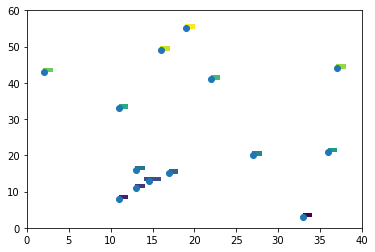

19


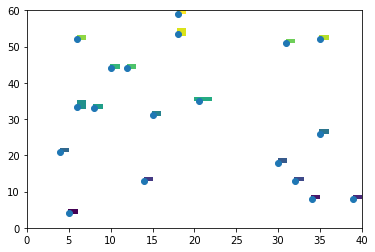

In [124]:
for pred in preds[:2]:
    holo_label, label_count = label(np.where(pred >= 0.3, 1, 0))
    print(label_count)
    com = np.array(center_of_mass(pred, holo_label, np.arange(1, label_count+1)))
    plt.pcolormesh(np.ma.array(holo_label, mask=holo_label<1))
    plt.scatter(com[:,1], com[:, 0])
    plt.show()


In [125]:
com

array([[ 4.        ,  5.        ],
       [ 8.        , 34.        ],
       [ 8.        , 39.        ],
       [13.        , 14.        ],
       [13.        , 32.        ],
       [18.        , 30.        ],
       [21.        ,  4.        ],
       [26.        , 35.        ],
       [31.        , 15.        ],
       [33.46031856,  6.        ],
       [33.        ,  8.        ],
       [35.        , 20.52892482],
       [44.        , 10.        ],
       [44.        , 12.        ],
       [51.        , 31.        ],
       [52.        ,  6.        ],
       [52.        , 35.        ],
       [53.44955008, 18.        ],
       [59.        , 18.        ]])

In [ ]:
def load_particle_patches(inputs, train_particles, valid_particles):
    

In [ ]:

valid_inputs_raw, valid_outputs_raw = load_raw_datasets(path_data, num_particles,
                                                'valid', output_cols, subset)
